In [2]:
import pandas as pd

df = pd.read_csv("https://github.com/dm-fedorov/pandas_basic/blob/master/data/tinkoff.csv?raw=True")
df

,Unnamed: 0,vacancy,company,creation_date,region,income,experience,employment_type,duties,requirements,conditions
0,0,Начинающий специалист по залоговому кредитованию,Тинькофф,2019-01-15,Москва,55000,не требуется,Полная занятость,"- Звонить клиентам, которым банк одобрил креди...",NaN,- График работы 5/2 с плавающими выходными;\n-...
1,1,Начинающий специалист в банк,Тинькофф,2019-01-15,Москва,50000,не требуется,Полная занятость,- Работать с действующими и потенциальными кли...,- Грамотная речь;\n- Уверенный пользователь ПК.,- Стабильную заработную плату: гарантированный...
2,2,Менеджер по работе с корпоративными клиентами ...,Тинькофф,2019-01-15,Москва,50000,1–3 года,Полная занятость,- Самостоятельный поиск и активное привлечение...,"- Желание работать в современном, высококвалиф...",- Обучение у лучших тренеров и наставников бан...
3,3,Менеджер по привлечению юридических лиц,Тинькофф,2019-01-15,Коломна,80000,не требуется,Полная занятость,- Поиск и привлечение юридических лиц;\n- Пров...,"- Активная жизненная позиция;\n- Мобильность, ...","- Работу в успешном, а главное, стабильном Бан..."
4,4,Менеджер по привлечению юридических лиц,Тинькофф,2019-01-15,Одинцово,80000,не требуется,Полная занятость,- Поиск и привлечение юридических лиц;\n- Пров...,"- Активная жизненная позиция;\n- Мобильность, ...","- Работу в успешном, а главное, стабильном Бан..."
...,...,...,...,...,...,...,...,...,...,...,...
2695,2695,Агент по доставке продуктов Тинькофф,Тинькофф,2020-03-02,Иркутск,50000,не требуется,Полная занятость,- Доставлять продукцию компании;\n- Помогать к...,- Умение ориентироваться в городе;\n- Приветст...,- Корпоративная мобильная связь;\n- Работа в ф...
2696,2696,Агент по доставке продуктов Тинькофф,Тинькофф,2020-03-02,Сочи,35000,не требуется,Полная занятость,- Доставлять продукцию компании;\n- Помогать к...,- Умение ориентироваться в городе;\n- Разъездн...,- Корпоративная мобильная связь;\n- Выполнение...
2697,2697,Представитель Тинькофф,Тинькофф,2020-01-30,Пермь,40000,не требуется,Полная занятость,"- Проводить встречи с клиентами, доставлять пр...","- Разъездной формат работы, компания автомобил...","- Работа в формате 5/2, 2/2, дни, свободные от..."
2698,2698,Дизайнер мобильных приложений,Тинькофф,2020-01-22,Москва,0,1–3 года,Полная занятость,- Создание и доработка дизайна финансовых моби...,- Опыт работы в области дизайна и проектирован...,"- Профессиональное развитие: проводим митапы, ..."


In [19]:
mf=df.loc[df.requirements.notna()]

In [20]:
from itertools import chain


In [21]:
skills = list(chain.from_iterable(mf['requirements'].apply(lambda x: x.split('\n')).values))

In [48]:
from collections import Counter
skills=Counter(skills)

In [23]:
duties=list(chain.from_iterable(df.loc[df.duties.notna()]['duties'].apply(lambda x: x.split('\n')).values))

In [49]:
duties=Counter(duties)

In [42]:
top_skills=Counter(chain.from_iterable(mf.sort_values('income',ascending=False)[:90].requirements.apply(lambda x: x.split('\n')).values))

In [41]:
top_duties=Counter(chain.from_iterable(mf.sort_values('income',ascending=False)[:90].duties.apply(lambda x: x.split('\n')).values))

In [39]:
from matplotlib import pyplot as plt

In [52]:
skills.most_common(10)

[('- Умение ориентироваться в городе;', 667),
 ('- Приветствуется опыт работы в таких компаниях как: Сбербанк, Альфа-банк, Открытие, Почта Банк, Евросеть, Связной, М. Видео, МТС, Мегафон, а также в службе доставки (курьер).',
  414),
 ('- Разъездной формат работы, компания автомобиль не предоставляет;', 300),
 ('- Грамотная речь;', 273),
 ('- Корпоративная мобильная связь;', 270),
 ('- Возможность получить новые навыки или прокачать существующие.', 270),
 ('- Уверенный пользователь ПК.', 234),
 ('- Грамотная речь.', 217),
 ('- Могут читать на английском языке (англоязычные форумы и документацию, когда самостоятельно найти решение проблемы не удаётся).',
  185),
 ('- Работа в формате 5/2, 2/2, дни, свободные от выполнения работ – плавающие;',
  180)]

In [53]:
duties.most_common(10)

[('- Доставлять продукцию компании;', 363),
 ('- Помогать клиентам в решении их вопросов;', 288),
 ('- Консультировать клиентов по продуктам банка.', 288),
 ('- Консультировать клиентов по их вопросам;', 267),
 ('- Мотивировать клиента подключить дополнительные услуги.', 181),
 ('- Проведение презентаций и переговоров с первыми лицами компаний;', 161),
 ('- Проводить встречи с клиентами, доставлять продукцию компании;', 161),
 ('- Поиск и привлечение юридических лиц;', 107),
 ('- Инциденты заводят сотрудники, которые отвечают за общение с клиентами. Т.е. вы занимаетесь только решением, с клиентами никак не коммуницируете.',
  87),
 ('- Инциденты заводятся в системе Service Desk.', 87)]

In [54]:
top_skills.most_common(10)

[('- Мотивация на карьерный рост и профессиональное развитие;', 36),
 ('- Готовность принимать решения в рамках своих компетенций;', 36),
 ('- Мобильность, готовность к разъездному характеру работы.', 36),
 ('- Умение отстаивать интересы Компании;', 33),
 ('- Опыт успешных продаж. Взаимодействие с партнёрами/ Ведение проектной деятельности, является преимуществом;',
  31),
 ('- Активная жизненная позиция, нацеленность на результат. Аналитический склад ума (опыт в сфере аналитики, является преимуществом);',
  31),
 ('- Активность, амбициозность;', 17),
 ('- Мобильность, готовность к разъездному характеру работы;', 17),
 ('- Возможность работать в формате home-office - работа в удобном для Вас месте;',
  17),
 ('- Внесение информации в систему (ПК и интернет соединение компания не предоставляет).',
  17)]

In [55]:
top_duties.most_common(10)

[('- Привлечение новых партнеров (переговоры, согласование коммерческих условий, подписание договоров и т.д.);',
  36),
 ('- Разработка и проведение совместных интеграционных проектов, маркетинговых мероприятий, акций и иной проектной деятельности;',
  36),
 ('- Ведение портфеля действующих партнеров. Формировании стратегии продаж через Партнёров, продуктов SME;',
  31),
 ('- Выполнение плановых показателей (План по привлечению партнеров/клиентов, План по реализации проектов).',
  31),
 ('- Поиск и привлечение компаний – партнеров (продукт – расчетные счета);',
  17),
 ('- Проведение презентаций и переговоров с первыми лицами компаний;', 17),
 ('- Выстраивание долгосрочных отношений с партнерами;', 17),
 ('- Заключение договоров с партнерами.', 17),
 ('- Обучение новых сотрудников;', 12),
 ('- Проведение обучения для действующих сотрудников;', 12)]

([<matplotlib.patches.Wedge at 0x7fbeb7965f50>,
 [Text(1.0996455550979818, 0.02792226984418547, '- имеете опыт управления отделом продаж от 3 лет;'),
  Text(1.0968113662566887, 0.08369484362931688, '- грамотно планируете, управляете и оцениваете продажи своих сотрудников;'),
  Text(1.0911502933154813, 0.13925170518718716, '- владеете навыками поиска базы клиентов;'),
  Text(1.082676926930126, 0.19444966416309106, '- имеете опыт в подключении компаний или можете пойти и лично подключить компании к POS;'),
  Text(1.0714131060653203, 0.24914645522556203, '- владеете навыками в подборе менеджеров по продажам;'),
  Text(1.057387861707692, 0.30320110473617173, '- умеете обучать сотрудников;'),
  Text(1.0406373420423274, 0.35647429409016357, '- сможете сформировать регламентную базу, обеспечивающую продажи.'),
  Text(1.0263117001043176, 0.3958336699031366, '- Высшее образование;'),
  Text(1.0159332042002873, 0.42175789809242137, '- Опыт работы в сфере привлечения сегмента МСБ от одного года;'

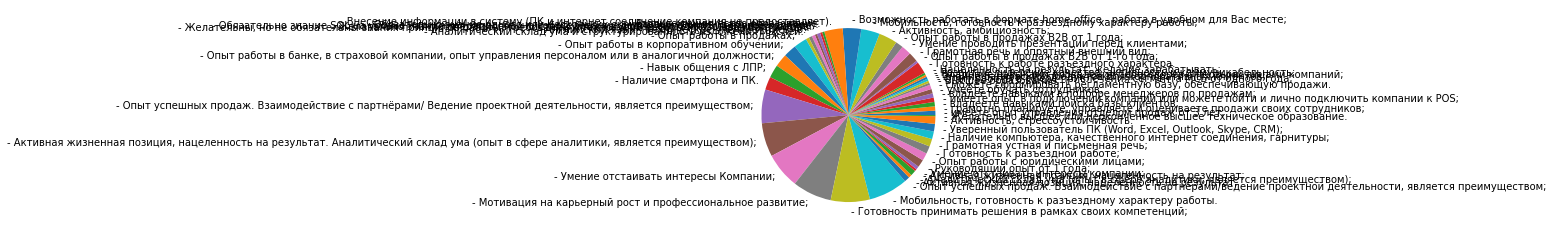

In [44]:
plt.pie(top_skills.values(),labels=top_skills.keys())

([<matplotlib.patches.Wedge at 0x7fbeb783f8d0>,
 [Text(1.0995346450834869, 0.03199319085572316, '- строить с нуля сеть прямых продаж POS среднему и крупному бизнесу;'),
  Text(1.0976448155273815, 0.07194344268841218, '- заниматься поиском и собеседованием кандидатов на позиции менеджеров по продажам;'),
  Text(1.0943039230408316, 0.11179858683116643, '- обучать менеджеров;'),
  Text(1.08951638421213, 0.15150593563727632, '- следить за качеством работы;'),
  Text(1.083288528065041, 0.19101299684230105, '- ставить планы и следить за их выполнением;'),
  Text(1.070349357197973, 0.2536774596724868, '- придумывать и внедрять необходимые регламенты и системы, которые будут обеспечивать продажи.'),
  Text(1.0560548391740832, 0.3078119176656448, '- заниматься поиском и адаптацией сотрудников;'),
  Text(1.0416231415825103, 0.35358341437315993, '- принимать участие во встречах с ЛПР крупных партнеров;'),
  Text(1.0280808168240416, 0.39121584078154564, '- Поиск, привлечение и консультирование кли

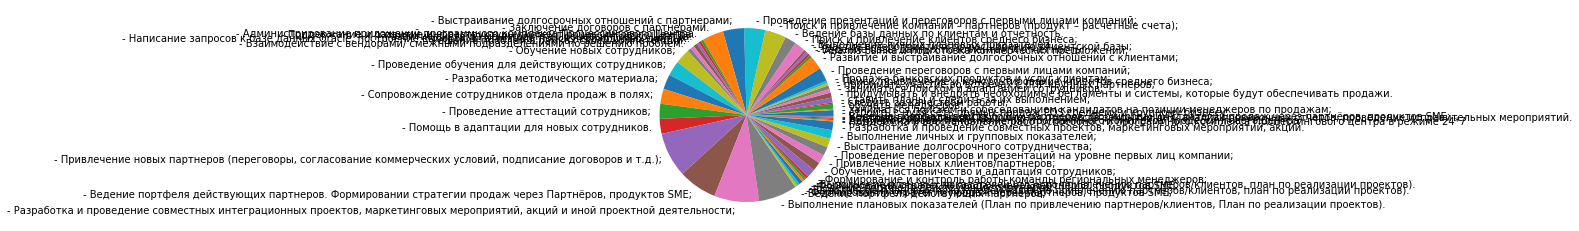

In [45]:
plt.pie(top_duties.values(),labels=top_duties.keys())

([<matplotlib.patches.Wedge at 0x7fbeba2a8410>,
  ...],
 [Text(1.0999960209767112, 0.0029586881218981137, '- Звонить клиентам, которым банк одобрил кредит под залог;'),
  Text(1.0999641889631204, 0.00887597874629326, '- Согласовывать условия кредита;'),
  Text(1.0954930763888404, 0.09947321038407543, '- Консультировать клиентов по их вопросам;'),
  Text(1.0835727473989116, 0.1893940365860944, '- Назначать встречи с представителем банка.'),
  Text(1.0818311629933932, 0.19910131786696486, '- Работать с действующими и потенциальными клиентами банка по телефону;'),
  Text(1.0792468817867575, 0.21266444967027448, '- Проводить финансовые консультации;'),
  Text(1.0764925638481175, 0.2261940759164723, '- Осуществлять продажи продуктов и услуг;'),
  Text(1.073568643123801, 0.23968806499557085, '- Мотивировать клиентов на погашение долга.'),
  Text(1.0710028163839325, 0.25090429908171186, '- Самостоятельный поиск и активное привлечение новых клиентов;'),
  Text(1.0564220523604695, 0.30654925752

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 129 missing from current font.
  font.set_text(s, 0, flags=flags)


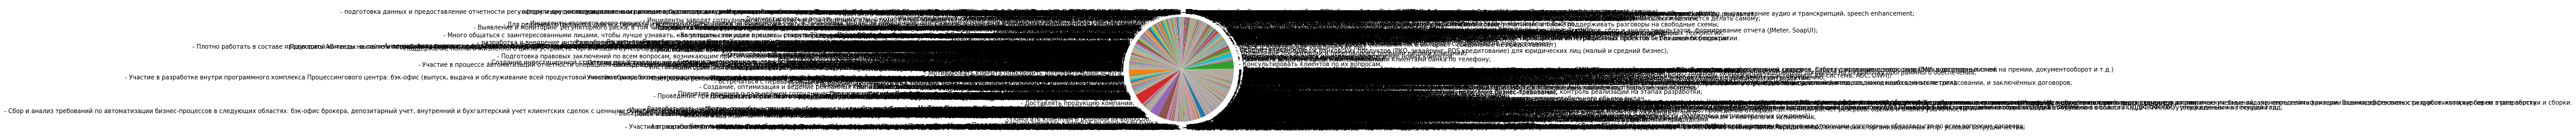

In [50]:
plt.pie(duties.values(),labels=duties.keys())

([<matplotlib.patches.Wedge at 0x7fbeb5e90fd0>,
  ...],
 [Text(1.0979252971671558, 0.06752808186534559, '- Грамотная речь;'),
  Text(1.0831017665710574, 0.1920691626749466, '- Уверенный пользователь ПК.'),
  Text(1.0708168485677323, 0.2516967954175631, '- Желание работать в современном, высококвалифицированном и дружелюбном коллективе;'),
  Text(1.0693260392056863, 0.25795701556011086, '- Навык проведения переговоров с первыми лицами компаний;'),
  Text(1.0677986316131012, 0.26420840699188325, '- Мобильность, готовность к разъездному характеру работы (80% - работа на закрепленной территории);'),
  Text(1.0663562785250005, 0.26997090074730623, '- Опыт работы – не менее полугода в сфере продаж или торговым представителем;'),
  Text(1.0648828277411027, 0.2757255214558737, '- Энергичность, стремление к достижениям, ориентация на результат;'),
  Text(1.0633783222310278, 0.281472101298023, '- Уровень образования – не ниже среднего;'),
  Text(1.0609327847086056, 0.2905539989923448, '- Презент

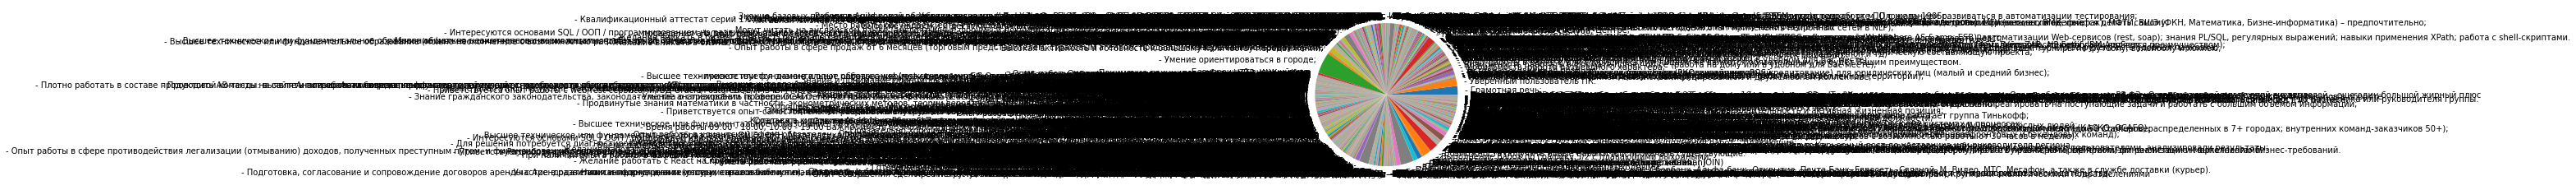

In [51]:
plt.pie(skills.values(),labels=skills.keys())